<a href="https://colab.research.google.com/github/nameera-khan/Fraud_detection/blob/main/Fraud_detection_XGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!kaggle datasets download -d ealaxi/paysim1


Dataset URL: https://www.kaggle.com/datasets/ealaxi/paysim1
License(s): CC-BY-SA-4.0
paysim1.zip: Skipping, found more recently modified local copy (use --force to force download)


In [33]:
!unzip paysim1.zip -d /content


Archive:  paysim1.zip
replace /content/PS_20174392719_1491204439457_log.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [34]:
import pandas as pd

df = pd.read_csv("/content/PS_20174392719_1491204439457_log.csv")
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [36]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


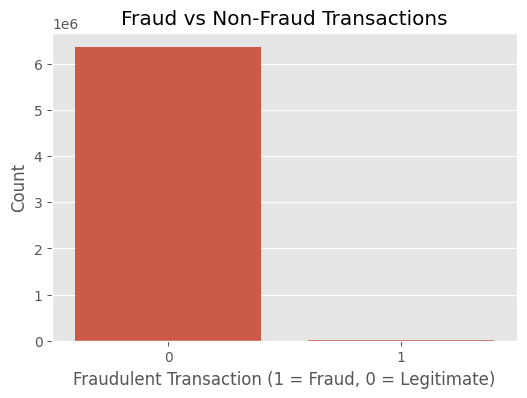

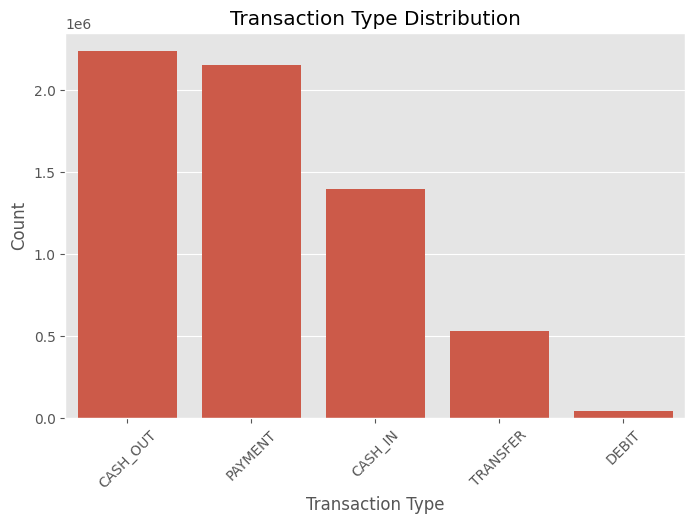

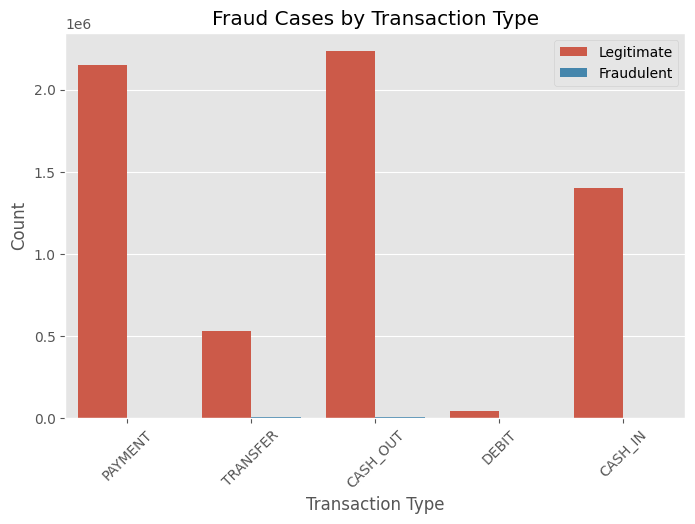

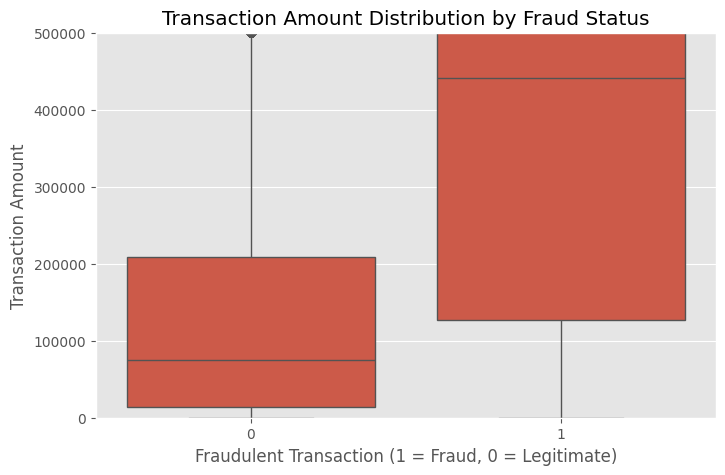

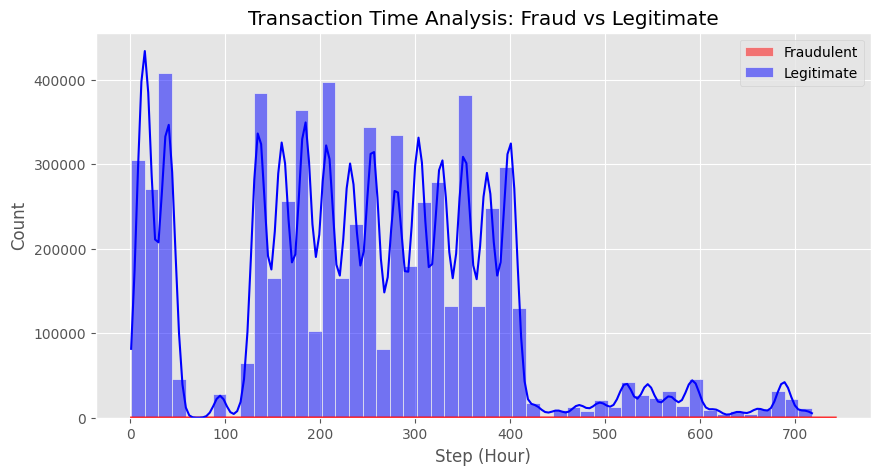

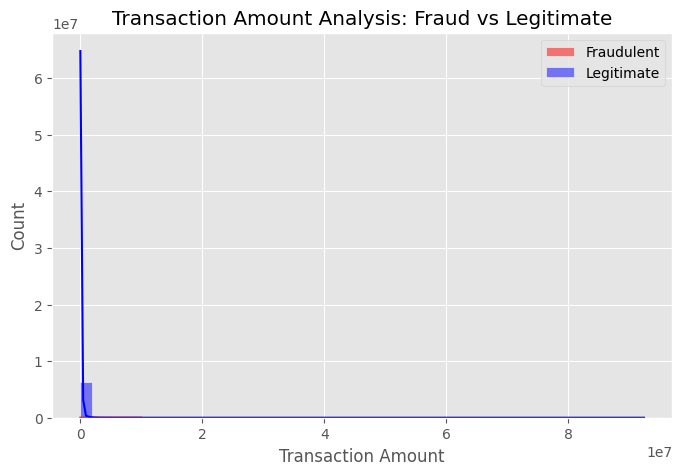

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use("ggplot")

# Fraud distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["isFraud"])
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Fraudulent Transaction (1 = Fraud, 0 = Legitimate)")
plt.ylabel("Count")
plt.show()

# Transaction Type Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df["type"], order=df["type"].value_counts().index)
plt.title("Transaction Type Distribution")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Fraud Count by Transaction Type
plt.figure(figsize=(8, 5))
sns.countplot(x=df["type"], hue=df["isFraud"])
plt.title("Fraud Cases by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.legend(["Legitimate", "Fraudulent"])
plt.xticks(rotation=45)
plt.show()

# Boxplot of Transaction Amount by Fraud Status
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["isFraud"], y=df["amount"])
plt.title("Transaction Amount Distribution by Fraud Status")
plt.xlabel("Fraudulent Transaction (1 = Fraud, 0 = Legitimate)")
plt.ylabel("Transaction Amount")
plt.ylim(0, 500000)  # Set limit for better visualization
plt.show()

# Fraud Cases by Step (Time Analysis)
plt.figure(figsize=(10, 5))
sns.histplot(df[df["isFraud"] == 1]["step"], bins=50, kde=True, color='red', label="Fraudulent")
sns.histplot(df[df["isFraud"] == 0]["step"], bins=50, kde=True, color='blue', label="Legitimate", alpha=0.5)
plt.title("Transaction Time Analysis: Fraud vs Legitimate")
plt.xlabel("Step (Hour)")
plt.ylabel("Count")
plt.legend()
plt.show()

# Fraud Cases by Transaction Amount
plt.figure(figsize=(8, 5))
sns.histplot(df[df["isFraud"] == 1]["amount"], bins=50, kde=True, color='red', label="Fraudulent")
sns.histplot(df[df["isFraud"] == 0]["amount"], bins=50, kde=True, color='blue', label="Legitimate", alpha=0.5)
plt.title("Transaction Amount Analysis: Fraud vs Legitimate")
plt.xlabel("Transaction Amount")
plt.ylabel("Count")
plt.legend()
plt.show()


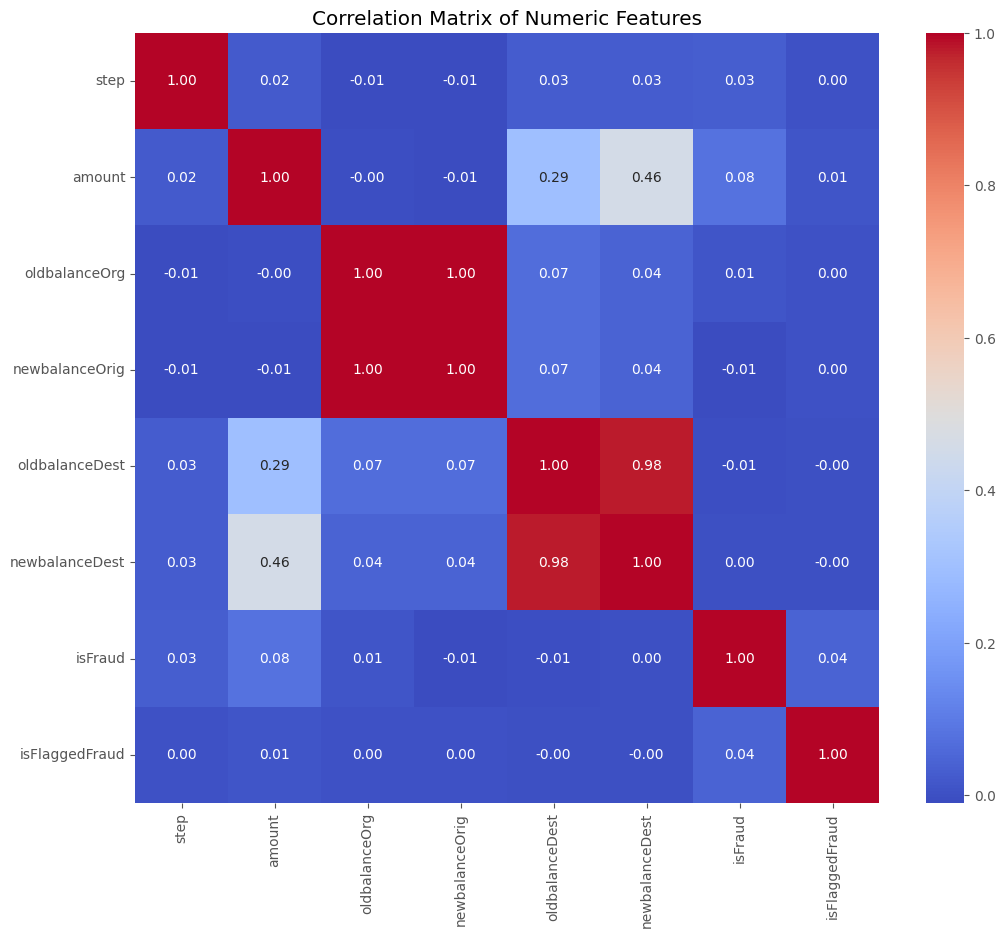

In [39]:
# prompt: plot a heat map of correlation of the numeric features

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric features for correlation analysis
numeric_features = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_features.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()


In [40]:
df.isFraud.value_counts()

,count
isFraud,
0,6354407
1,8213


## Data Preprocessing

In [41]:
df.type.value_counts()

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


In [7]:


df_encoded = pd.get_dummies(df, columns=['type'], drop_first=True)
print(df_encoded)

df_encoded.head()


         step      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0           1     9839.64  C1231006815      170136.00       160296.36   
1           1     1864.28  C1666544295       21249.00        19384.72   
2           1      181.00  C1305486145         181.00            0.00   
3           1      181.00   C840083671         181.00            0.00   
4           1    11668.14  C2048537720       41554.00        29885.86   
...       ...         ...          ...            ...             ...   
6362615   743   339682.13   C786484425      339682.13            0.00   
6362616   743  6311409.28  C1529008245     6311409.28            0.00   
6362617   743  6311409.28  C1162922333     6311409.28            0.00   
6362618   743   850002.52  C1685995037      850002.52            0.00   
6362619   743   850002.52  C1280323807      850002.52            0.00   

            nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
0        M1979787155            0.00      

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False,True,False
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False,True,False
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,False,False,True
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,True,False,False,False
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,False,False,True,False


In [8]:

df_encoded['type_CASH_OUT'] = df_encoded['type_CASH_OUT'].replace({True: 1, False: 0})
df_encoded['type_DEBIT'] = df_encoded['type_DEBIT'].replace({True: 1, False: 0})
df_encoded['type_PAYMENT'] = df_encoded['type_PAYMENT'].replace({True: 1, False: 0})
df_encoded['type_TRANSFER'] = df_encoded['type_TRANSFER'].replace({True: 1, False: 0})

<ipython-input-8-859906f51782>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded['type_CASH_OUT'] = df_encoded['type_CASH_OUT'].replace({True: 1, False: 0})
<ipython-input-8-859906f51782>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded['type_DEBIT'] = df_encoded['type_DEBIT'].replace({True: 1, False: 0})
<ipython-input-8-859906f51782>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy

In [9]:
df_encoded

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,1,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1,0,0,0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,1,0,0,0
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0,0,0,1
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,1,0,0,0
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0,0,0,1


In [10]:
df_encoded.columns

Index(['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT',
       'type_TRANSFER'],
      dtype='object')

In [12]:
#using standscaler to normalise the input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Select features & target variable
features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest','isFlaggedFraud', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT',
       'type_TRANSFER']
target = "isFraud"


In [13]:
X = df_encoded[features]
y = df_encoded[target]

# Scale numerical features
scaler = StandardScaler()
X[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]] = scaler.fit_transform(
    X[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]])


<ipython-input-13-4a5fff3567d8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]] = scaler.fit_transform(


In [14]:
#oversampling the imbalanced dataset using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

X_res,y_yes = sm.fit_resample(X,y)

In [ ]:

resampled_df = pd.concat([X_res, y_yes], axis=1)

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='type_CASH_OUT', hue='isFraud', data=resampled_df)
plt.title('Fraudulent vs Legitimate Transactions for Each Transaction Type (Resampled Data)')
plt.xlabel('Transaction Type (Encoded)')
plt.ylabel('Count')
plt.legend(title='Transaction Type', labels=['Legitimate', 'Fraudulent'])
plt.show()


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_yes, test_size=0.2, random_state=42)

In [16]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [18]:
# Calculate scale_pos_weight: ratio of non-fraud to fraud
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

xgb_model = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    random_state=42
)


In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score


xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

Accuracy: 0.9976
Precision: 0.9974
Recall: 0.9979
F1 Score: 0.9976


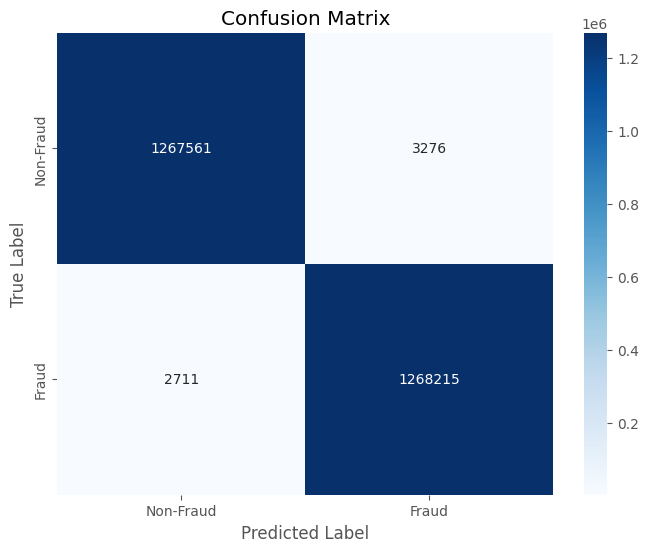

In [22]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined from your model training
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Fraud", "Fraud"],
            yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


1. True Positives (TP):
Located in the bottom-right corner.
Value: 1,268,231.
Represents the number of fraud cases correctly classified as fraud by the model.
2. True Negatives (TN):
Located in the top-left corner.
Value: 1,263,767.
Represents the number of non-fraud cases correctly classified as non-fraud by the model.
3. False Positives (FP) (Type I error):
Located in the top-right corner.
Value: 3,470.
Represents the number of non-fraud cases incorrectly classified as fraud by the model.
4. False Negatives (FN) (Type II error):
Located in the bottom-left corner.
Value: 2,695.
Represents the number of fraud cases incorrectly classified as non-fraud by the model.


In [23]:
import shap
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# Initialize SHAP explainer
explainer = shap.Explainer(xgb_model)


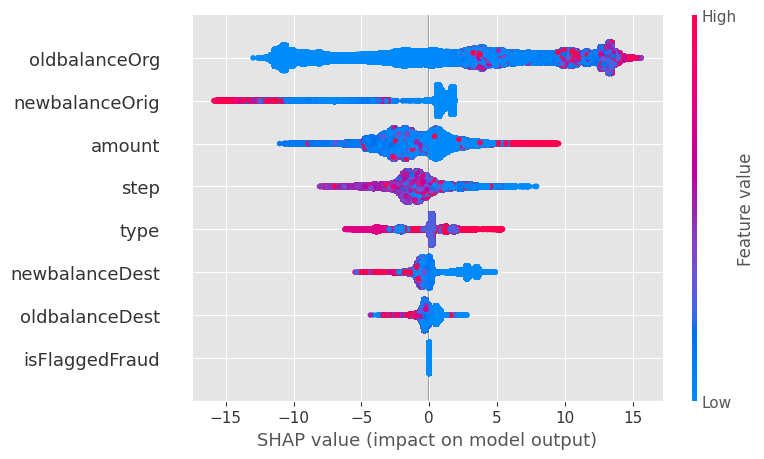

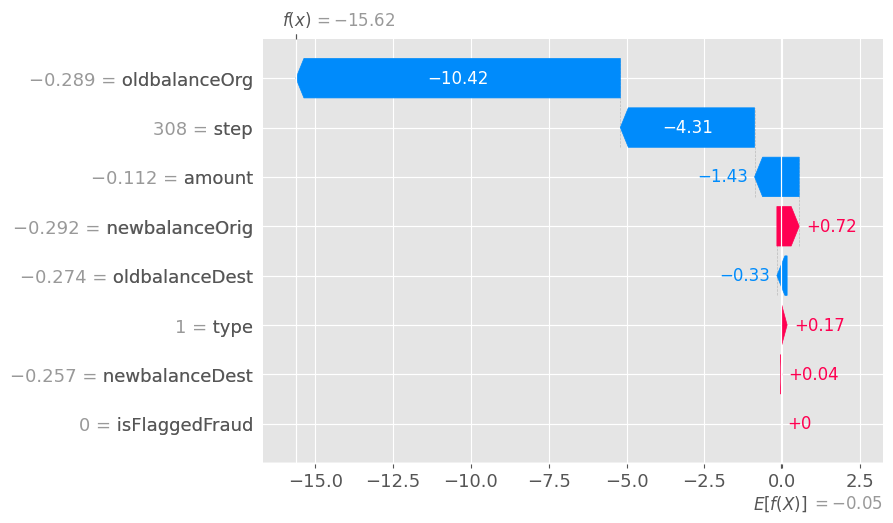

In [24]:

# Calculate SHAP values
shap_values = explainer(X_test)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test)

# Visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])


**Conclusion**:
oldbalanceOrg, newbalanceOrig, and amount are the most critical features for detecting fraud.

The model effectively uses transaction type (CASH_OUT, TRANSFER) as a risk indicator.
Time patterns (step) play a role but have less impact than monetary features.

## XGBoost with feature engineering

In [17]:
# Difference between original and new balances (helps catch balance anomalies)
X_train['balanceDiffOrig'] = X_train['oldbalanceOrg'] - X_train['newbalanceOrig']
X_train['balanceDiffDest'] = X_train['oldbalanceDest'] - X_train['newbalanceDest']

# Ratio of transaction amount to original balance (useful for large transfers)
X_train['amountToBalanceRatio'] = X_train['amount'] / (X_train['oldbalanceOrg'] + 1e-9)

# Flag for suspicious zero-balance behavior
X_train['origZeroBal'] = (X_train['oldbalanceOrg'] == 0).astype(int)
X_train['destZeroBal'] = (X_train['oldbalanceDest'] == 0).astype(int)


In [18]:
X_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,balanceDiffOrig,balanceDiffDest,amountToBalanceRatio,origZeroBal,destZeroBal
1029741,49,-0.292409,-0.248050,-0.251148,-0.323814,-0.333411,0,0,0,0,0,0.003099,0.009598,1.178830,0,0
511674,20,0.096263,-0.286023,-0.292442,-0.249963,-0.200312,0,1,0,0,0,0.006419,-0.049651,-0.336555,0,0
1450041,140,-0.183864,-0.153810,-0.135647,-0.082207,-0.128620,0,0,0,0,0,-0.018164,0.046413,1.195391,0,0
7396148,694,-0.267740,-0.282420,-0.292442,-0.323814,-0.333411,0,0,0,0,1,0.010021,0.009598,0.948020,0,0
10742064,250,16.262325,10.189100,6.637154,-0.323814,-0.333411,0,0,0,0,1,3.551945,0.009598,1.596051,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234489,186,-0.293781,-0.288716,-0.292442,-0.323814,-0.333411,0,0,0,1,0,0.003725,0.009598,1.017542,0,0
4304572,307,-0.176931,-0.281692,-0.292442,-0.248471,-0.243833,0,1,0,0,0,0.010750,-0.004639,0.628101,0,0
10081351,217,0.752653,-0.069082,-0.292442,-0.323814,-0.333411,0,0,0,0,1,0.223360,0.009598,-10.895078,0,0
6550634,501,-0.043659,-0.235571,-0.292442,-0.323814,-0.333411,0,0,0,0,1,0.056871,0.009598,0.185333,0,0


In [19]:
# Assuming 'step' represents hours
X_train['hour'] = X_train['step'] % 24
X_train['day'] = X_train['step'] // 24


In [29]:
X_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,balanceDiffOrig,balanceDiffDest,amountToBalanceRatio,origZeroBal,destZeroBal,type_1,type_2,type_3,type_4,hour,day
1029741,49,-0.292409,-0.248050,-0.251148,-0.323814,-0.333411,0,0.003099,0.009598,1.178830,0,0,False,False,False,False,1,2
511674,20,0.096263,-0.286023,-0.292442,-0.249963,-0.200312,0,0.006419,-0.049651,-0.336555,0,0,True,False,False,False,20,0
1450041,140,-0.183864,-0.153810,-0.135647,-0.082207,-0.128620,0,-0.018164,0.046413,1.195391,0,0,False,False,False,False,20,5
7396148,694,-0.267740,-0.282420,-0.292442,-0.323814,-0.333411,0,0.010021,0.009598,0.948020,0,0,False,False,False,True,22,28
10742064,250,16.262325,10.189100,6.637154,-0.323814,-0.333411,0,3.551945,0.009598,1.596051,0,0,False,False,False,True,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234489,186,-0.293781,-0.288716,-0.292442,-0.323814,-0.333411,0,0.003725,0.009598,1.017542,0,0,False,False,True,False,18,7
4304572,307,-0.176931,-0.281692,-0.292442,-0.248471,-0.243833,0,0.010750,-0.004639,0.628101,0,0,True,False,False,False,19,12
10081351,217,0.752653,-0.069082,-0.292442,-0.323814,-0.333411,0,0.223360,0.009598,-10.895078,0,0,False,False,False,True,1,9
6550634,501,-0.043659,-0.235571,-0.292442,-0.323814,-0.333411,0,0.056871,0.009598,0.185333,0,0,False,False,False,True,21,20


In [20]:
import numpy as np

# Assign higher weights to risky transaction types
sample_weights = np.where(
    (X_train['type_CASH_OUT'] == 1) | (X_train['type_TRANSFER'] == 1), 5, 1
)

In [21]:
# Calculate scale_pos_weight for class imbalance
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

xgb_model = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    learning_rate=0.1,
    max_depth=7,
    n_estimators=50,
    random_state=42,
    colsample_bytree=0.8,
    subsample=0.8
)

xgb_model.fit(X_train, y_train, sample_weight=sample_weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [23]:
# Difference between original and new balances (helps catch balance anomalies)
X_test['balanceDiffOrig'] = X_test['oldbalanceOrg'] - X_test['newbalanceOrig']
X_test['balanceDiffDest'] = X_test['oldbalanceDest'] - X_test['newbalanceDest']

# Ratio of transaction amount to original balance (useful for large transfers)
X_test['amountToBalanceRatio'] = X_test['amount'] / (X_test['oldbalanceOrg'] + 1e-9)

# Flag for suspicious zero-balance behavior
X_test['origZeroBal'] = (X_test['oldbalanceOrg'] == 0).astype(int)
X_test['destZeroBal'] = (X_test['oldbalanceDest'] == 0).astype(int)

In [25]:
X_test

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,balanceDiffOrig,balanceDiffDest,amountToBalanceRatio,origZeroBal,destZeroBal
4343509,308,-0.112413,-0.288716,-0.292442,-0.274234,-0.257064,0,1,0,0,0,0.003725,-0.017170,0.389354,0,0
410044,18,-0.273137,-0.288716,-0.292442,-0.323814,-0.333411,0,0,0,1,0,0.003725,0.009598,0.946039,0,0
10522549,537,0.195732,-0.185520,-0.292442,0.322784,0.345922,0,1,0,0,0,0.106922,-0.023138,-1.055047,0,0
1467409,140,-0.291239,-0.270722,-0.276034,-0.323814,-0.333411,0,0,0,1,0,0.005312,0.009598,1.075783,0,0
8677127,512,1.724099,0.134023,-0.292442,-0.323814,-0.333411,0,0,0,0,1,0.426464,0.009598,12.864229,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3546414,260,-0.245181,-0.286779,-0.292442,-0.323814,-0.324754,0,1,0,0,0,0.005663,0.000940,0.854947,0,0
9302838,581,1.018805,-0.013436,-0.292442,-0.323814,-0.117013,0,1,0,0,0,0.279005,-0.206801,-75.823882,0,0
1602958,156,0.760607,-0.278049,-0.292442,-0.323814,-0.159449,0,1,0,0,0,0.014392,-0.164365,-2.735512,0,0
4464562,324,-0.246985,6.796642,6.716660,-0.139393,-0.171152,0,0,0,0,0,0.079982,0.031759,-0.036339,0,0


In [27]:
# Assuming 'step' represents hours
X_test['hour'] = X_test['step'] % 24
X_test['day'] = X_test['step'] // 24


In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

Accuracy: 0.9947
Precision: 0.9933
Recall: 0.9961
F1 Score: 0.9947


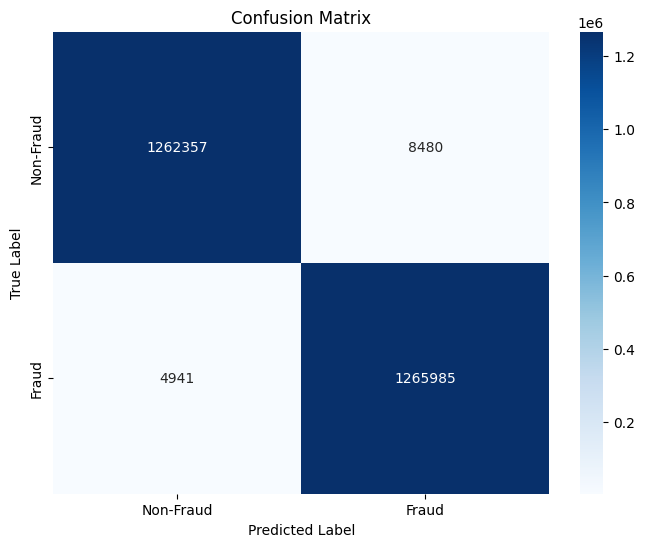

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined from your model training
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Fraud", "Fraud"],
            yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [31]:
import joblib

# Save the model
joblib.dump(xgb_model, 'XGBmodel.pkl')



['XGBmodel.pkl']